In [1]:

import numpy as np 
import pandas as pd
import re 
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("WELFake_Dataset_preprocessed.csv")

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    
    # 3. Remove special characters, numbers, and keep only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 4. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 5. Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # 6. Lemmatization (to get the root form of words)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df['text'] = df['text'].fillna("")

# Convert all text data to string type
df['text'] = df['text'].astype(str)

In [8]:
new_text = df['text'].tolist()

In [9]:
import joblib

vectorizer_text = CountVectorizer(stop_words="english",max_features=10000)

text_matrix = vectorizer_text.fit_transform(new_text).toarray()

joblib.dump(vectorizer_text, 'vectorizer_text.pkl')

print("Finished")

Finished


In [10]:
print(df.shape)
print(text_matrix.shape)

(61937, 2)
(61937, 10000)


In [11]:
# Creating Y
y = df.label
# Creating X
x = text_matrix

In [12]:
print(x.shape)
print(y.shape)

(61937, 10000)
(61937,)


In [13]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(49549, 10000)
(12388, 10000)
(49549,)
(12388,)


BUILDING MODEL USING PYTORCH

In [14]:
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__() 
        
        self.linear1 = nn.Linear(10000,5000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(105000,00) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(1000,200) 
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(200,20) 
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20,2)
        
    
    def forward(self,x):
        
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)

        
        out = self.linear5(out) # Output Layer
        
        return out
    

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
error = nn.CrossEntropyLoss()

FITTING  MODEL USING PYTORCH

In [15]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 10

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")


Loss after iteration 0 is 0.6896290183067322
Loss after iteration 1 is 0.6616836190223694
Loss after iteration 2 is 0.6044666767120361
Loss after iteration 3 is 0.5409310460090637
Loss after iteration 4 is 0.4748842120170593
Loss after iteration 5 is 0.43194836378097534
Loss after iteration 6 is 0.3698697090148926
Loss after iteration 7 is 0.3342245817184448
Loss after iteration 8 is 0.3008956015110016
Loss after iteration 9 is 0.26426324248313904


EVALUATING RESULTS

In [17]:
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)

# Prediction
y_head = model(X_test)  # Model predictions
y_pred = torch.max(y_head, 1)[1]  # Convert logits to predicted labels

# Convert tensors to NumPy arrays
Y_test_np = Y_test.cpu().numpy()  # Convert Y_test to a NumPy array
y_pred_np = y_pred.cpu().numpy()  # Convert y_pred to a NumPy array

# Metrics
accuracy = accuracy_score(Y_test_np, y_pred_np)
print("Model Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_test_np, y_pred_np)
print("\nConfusion Matrix:\n", conf_matrix)

precision = precision_score(Y_test_np, y_pred_np)
print("Precision:", precision)

recall = recall_score(Y_test_np, y_pred_np)
print("Recall:", recall)

f1 = f1_score(Y_test_np, y_pred_np)
print("F1 Score:", f1)

class_report = classification_report(Y_test_np, y_pred_np, target_names=["Fake", "Real"])
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.9152405553761704

Confusion Matrix:
 [[6463  350]
 [ 700 4875]]
Precision: 0.9330143540669856
Recall: 0.874439461883408
F1 Score: 0.9027777777777778

Classification Report:
               precision    recall  f1-score   support

        Fake       0.90      0.95      0.92      6813
        Real       0.93      0.87      0.90      5575

    accuracy                           0.92     12388
   macro avg       0.92      0.91      0.91     12388
weighted avg       0.92      0.92      0.91     12388



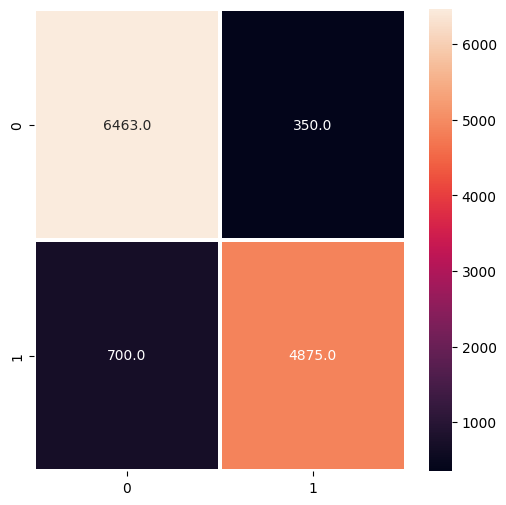

In [18]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()

In [29]:
# Save the trained model
torch.save(model.state_dict(), "ann_model.pth")

In [19]:
# Load the trained model
model = ANN()
model.load_state_dict(torch.load("ann_model.pth"))
model.eval()  # Set the model to evaluation mode

C:\Users\USER\AppData\Local\Temp\ipykernel_6912\1994646975.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("ann_model.pth"))


ANN(
  (linear1): Linear(in_features=10000, out_features=5000, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=5000, out_features=1000, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=1000, out_features=200, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=200, out_features=20, bias=True)
  (relu4): ReLU()
  (linear5): Linear(in_features=20, out_features=2, bias=True)
)

In [22]:

# Function to preprocess input text
def preprocess_input(text):
    cleaned_text = clean_text(text)
    
    # Convert the cleaned text into lists
    new_text = [cleaned_text]
    
    # Vectorize the cleaned title and text using the same vectorizers as training
    text_matrix = vectorizer_text.transform(new_text).toarray()
    
    # Concatenate the title and text vectors
    input_vector = text_matrix
    
    # Convert to torch tensor
    input_tensor = torch.Tensor(input_vector)
    
    return input_tensor


# Example to take user input for title and text
raw_text = input("Enter the content of the article: ")  # Take input for text

# Preprocess the input
input_tensor = preprocess_input(raw_text)

# Load the trained model
model = ANN()
model.load_state_dict(torch.load("ann_model.pth"))
model.eval()  # Set the model to evaluation mode

# Make the prediction
with torch.no_grad():  # Disable gradient computation for inference
    output = model(input_tensor)  # Forward pass through the model
    
# Get the predicted class (0 or 1)
predicted_class = torch.max(output, 1)[1].item()

# Interpret the prediction
if predicted_class == 1:
    print("The news is real.")
else:
    print("The news is fake.")


C:\Users\USER\AppData\Local\Temp\ipykernel_6912\1288091257.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("ann_model.pth"))


The news is real.
